In [220]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [7]:
default = pd.read_csv('defualt server', sep =',')

In [244]:
default = default.drop_duplicates()

In [21]:
new = pd.read_csv('new server', sep =',')

In [22]:
new.dataset.unique()

array(['user_10_item_1_exp'], dtype=object)

In [29]:
default = default[['model','hyper','metric','value']]

In [28]:
new = new[['model','hyper','metric','value']]

In [33]:
default.model.unique()

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_No',
       'CollectiveMF_Both', 'surprise_SVD', 'surprise_Baseline'],
      dtype=object)

In [41]:
new

,model,hyper,metric,value
0,FMItem,"[('model_info_used', 'Item'), ('n_iter', 10)]",ndcg@10,0.177147
1,FMItem,"[('model_info_used', 'Item'), ('n_iter', 10)]",precision@10,0.032249
2,FMItem,"[('model_info_used', 'Item'), ('n_iter', 10)]",rmse,131.929279
3,Test_implicit,"[('factors', 20), ('iteration', 20), ('learnin...",ndcg@10,0.044866
4,Test_implicit,"[('factors', 20), ('iteration', 20), ('learnin...",precision@10,0.008741
...,...,...,...,...
241,FMItem,"[('l2_reg_V', 0.3), ('l2_reg_w', 0.3), ('model...",precision@10,0.009370
242,FMItem,"[('l2_reg_V', 0.3), ('l2_reg_w', 0.3), ('model...",rmse,3.041566
243,FMItem,"[('l2_reg_V', 0.2), ('l2_reg_w', 0.2), ('model...",ndcg@10,0.042422
244,FMItem,"[('l2_reg_V', 0.2), ('l2_reg_w', 0.2), ('model...",precision@10,0.009081


In [66]:
def split_params(df):
    join_table = df.copy()
    join_table["list_hyper"] = join_table["hyper"].apply(eval)
    join_table = join_table.explode("list_hyper")
    join_table["params_name"], join_table["params_val"] = zip(*join_table["list_hyper"])

    return join_table


### Default server

In [245]:
default_split = split_params(default)[['model','metric','value','params_name','params_val']]

In [246]:
default_split.model.unique().tolist()

['CollectiveMF_Item',
 'CollectiveMF_User',
 'CollectiveMF_No',
 'CollectiveMF_Both',
 'surprise_SVD',
 'surprise_Baseline']

In [247]:
models = default_split.model.unique().tolist()

In [248]:
CollectiveMF_Item_set = default_split[default_split['model'] == models[0]]
CollectiveMF_User_set = default_split[default_split['model'] == models[1]]
CollectiveMF_No_set = default_split[default_split['model'] == models[2]]
CollectiveMF_Both_set = default_split[default_split['model'] == models[3]]
surprise_SVD_set = default_split[default_split['model'] == models[4]]
surprise_Baseline_set = default_split[default_split['model'] == models[5]]

## CollectiveMF_Item

In [249]:
CollectiveMF_Item_ndcg = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'ndcg@10']
CollectiveMF_Item_percision = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'precision@10']
CollectiveMF_Item_rmse = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'rmse']

#### ndcg

In [253]:
CollectiveMF_Item_ndcg = CollectiveMF_Item_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [260]:
CollectiveMF_Item_ndcg.k.unique()

array([ 8.,  4., 16.,  5.])

In [283]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]


#### rmse

In [258]:
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [449]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]
markerfacecolor = ['red', 'blue', 'black']

In [294]:
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.sort_values('reg_param').sort_values('value')
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.drop(index=[0,2])

In [300]:
CollectiveMF_Item_rmse[CollectiveMF_Item_rmse['w_main'] == 1.0]

params_name,value,k,reg_param,w_main
1,1.424653,4.0,0.0001,1.0
3,1.424668,16.0,0.0001,1.0
4,1.424674,8.0,0.0001,1.0
11,1.479676,4.0,0.0010,1.0
12,1.479698,8.0,0.0010,1.0
13,1.479710,16.0,0.0010,1.0
20,1.493331,8.0,0.0100,1.0
21,1.493336,4.0,0.0100,1.0
22,1.493337,16.0,0.0100,1.0


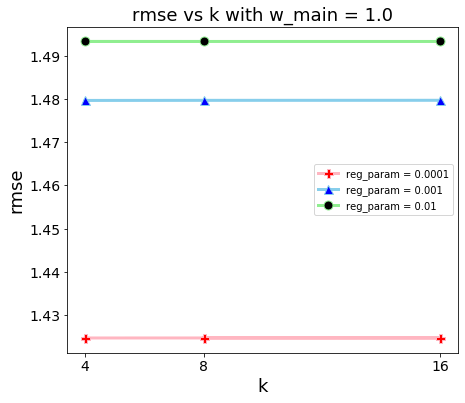

In [453]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1)&(CollectiveMF_Item_rmse['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('rmse vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [454]:
plt.savefig('rmse_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [310]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[0])]

params_name,value,k,reg_param,w_main
1,1.424653,4.0,0.0001,1.0
11,1.479676,4.0,0.0010,1.0
21,1.493336,4.0,0.0100,1.0


In [311]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[1])]

params_name,value,k,reg_param,w_main
4,1.424674,8.0,0.0001,1.0
12,1.479698,8.0,0.0010,1.0
20,1.493331,8.0,0.0100,1.0


In [312]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[2])]

params_name,value,k,reg_param,w_main
3,1.424668,16.0,0.0001,1.0
13,1.479710,16.0,0.0010,1.0
22,1.493337,16.0,0.0100,1.0


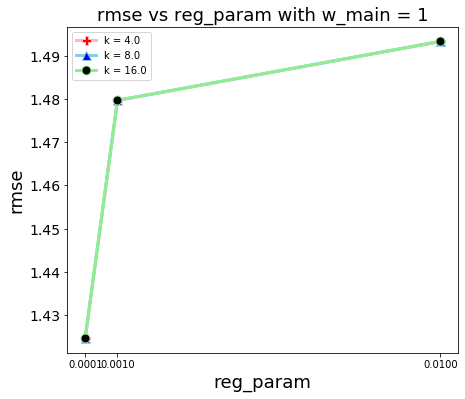

In [455]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('rmse vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)

In [456]:
plt.savefig('rmse_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

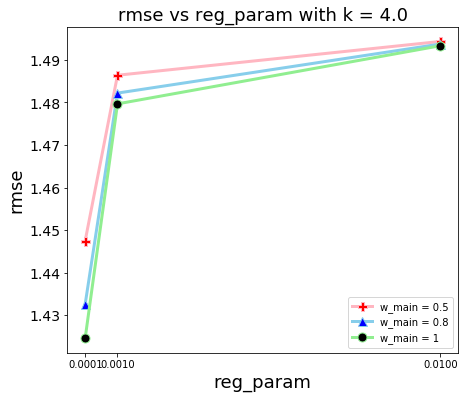

In [457]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['k'] == 4.0)&(CollectiveMF_Item_rmse['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('rmse vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)

In [458]:
plt.savefig('rmse_vs_reg_param_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

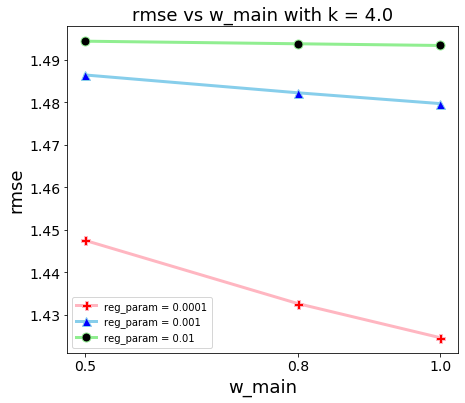

In [459]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['k'] == 4.0)&(CollectiveMF_Item_rmse['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('rmse vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [460]:
plt.savefig('rmse_vs_w_main_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

## CollectiveMF_User
## CollectiveMF_Both
## surprise_SVD
## surprise_Baseline

### New server

In [68]:
new_split = split_params(new)[['model','metric','value','params_name','params_val']]

In [70]:
new_split.model.unique()

array(['FMItem', 'Test_implicit', 'FMNone'], dtype=object)

In [72]:
Test_implicit_set = new_split[new_split['model'] == 'Test_implicit']
FMItem_set = new_split[new_split['model'] == 'FMItem']
FMNone_set = new_split[new_split['model'] == 'FMNone']

## Test_implicit

In [348]:
Test_implicit_set_ndcg = Test_implicit_set[Test_implicit_set['metric'] == 'ndcg@10']
Test_implicit_set_percision = Test_implicit_set[Test_implicit_set['metric'] == 'precision@10']
Test_implicit_set_rmse = Test_implicit_set[Test_implicit_set['metric'] == 'rmse']

In [96]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg.pivot(index="value", 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [323]:
Test_implicit_set_ndcg_original = Test_implicit_set_ndcg

In [412]:
color = ['lightgrey','blue','lightgreen']
marker = ['P', '^' ,'o']
factors = [4,8,16]
regularization = [0.001,0.005, 0.01 ]
learning_rate = [0.0001, 0.001, 0.005]


#### rmse

In [350]:
Test_implicit_set_rmse = Test_implicit_set_rmse.drop_duplicates()

In [351]:
Test_implicit_set_rmse = Test_implicit_set_rmse.pivot(index="value", 
                                                      columns='params_name', values='params_val').reset_index(inplace = False)

In [352]:
Test_implicit_set_rmse_original = Test_implicit_set_rmse

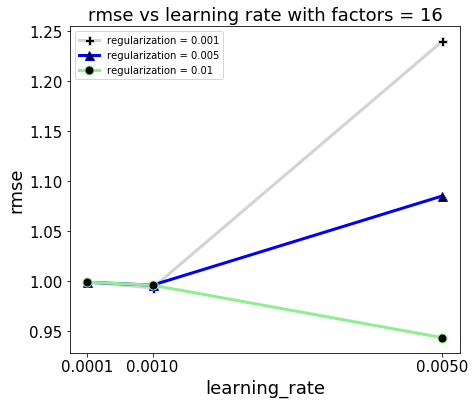

In [419]:
### Visualization of hyperparameters tuning
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('learning_rate')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 16)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize=18)
ax.set_xlabel('learning_rate',fontsize=18)
ax.set_title('rmse vs learning rate with factors = 16',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [420]:
plt.savefig('rmse_vs_learning_rate_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

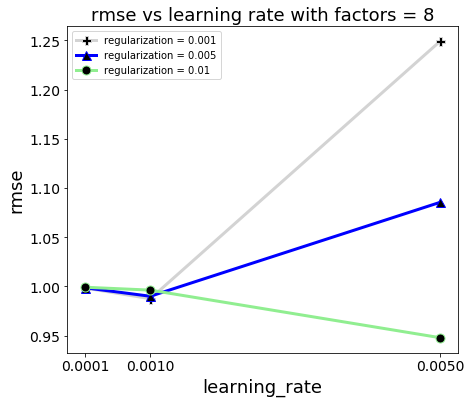

In [421]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 8)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('rmse vs learning rate with factors = 8',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [422]:
plt.savefig('rmse_vs_learning_rate_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

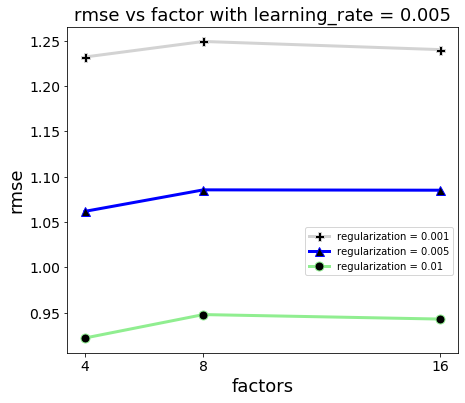

In [423]:
Test_implicit_set_rmse= Test_implicit_set_rmse_original.sort_values('factors')

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('factors', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['learning_rate'] == 0.005)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend(bbox_to_anchor=(1,0.4))
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('factors',fontsize = 18)
ax.set_title('rmse vs factor with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [424]:
plt.savefig('rmse_vs_factor_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

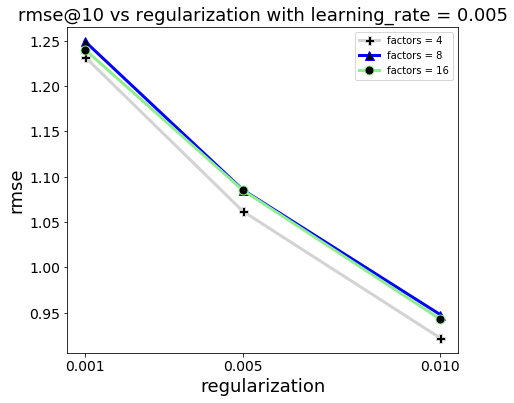

In [425]:
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'factors = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['learning_rate'] == 0.005)&(Test_implicit_set_rmse['factors']== factors[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse@10 vs regularization with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [426]:
plt.savefig('rmse_vs_regularization_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

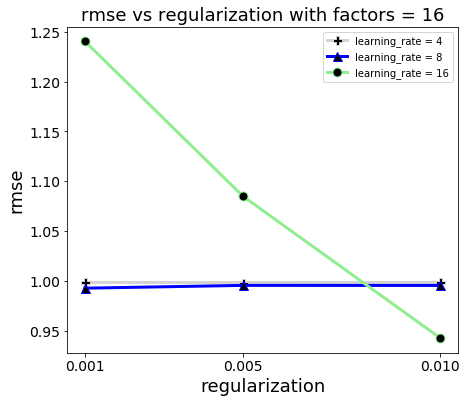

In [427]:
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 16)&(Test_implicit_set_rmse['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse vs regularization with factors = 16',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [428]:
plt.savefig('rmse_vs_regularization_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

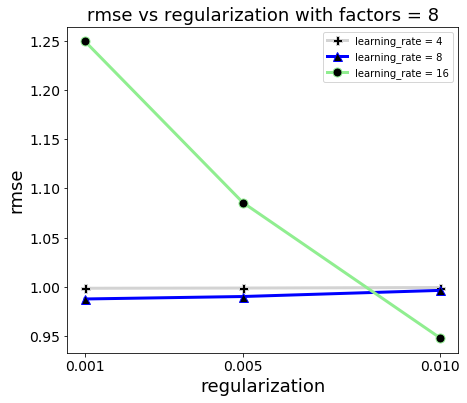

In [429]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 8)&(Test_implicit_set_rmse['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse vs regularization with factors = 8',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [430]:
plt.savefig('rmse_vs_regularization_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

#### ndcg

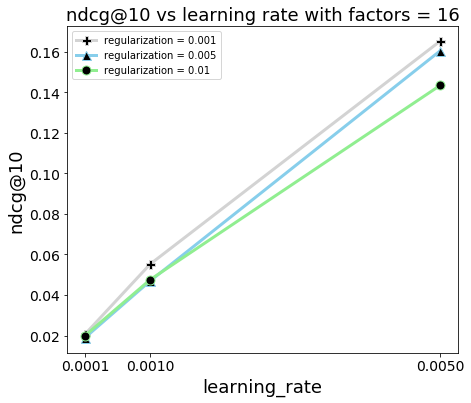

In [375]:
### Visualization of hyperparameters tuning
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('learning_rate')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 16)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('ndcg@10 vs learning rate with factors = 16',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [376]:
plt.savefig('ndcg_vs_learning_rate_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

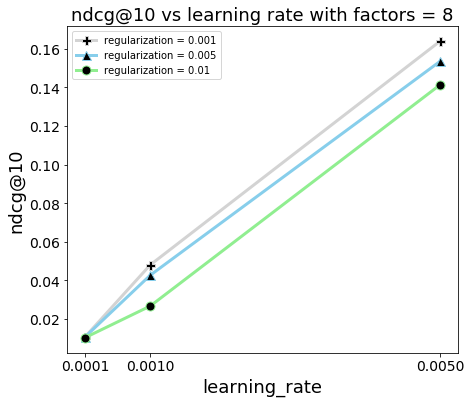

In [377]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 8)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('ndcg@10 vs learning rate with factors = 8',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [378]:
plt.savefig('ndcg_vs_learning_rate_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

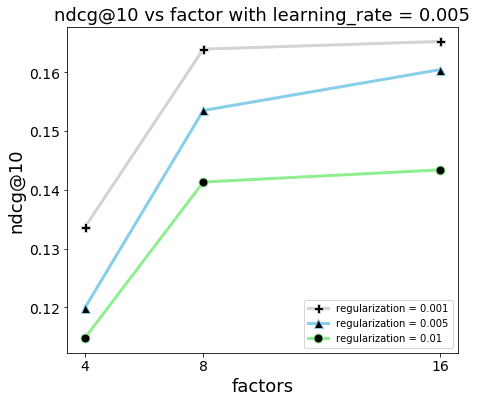

In [379]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('factors')

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('factors', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('factors',fontsize = 18)
ax.set_title('ndcg@10 vs factor with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [380]:
plt.savefig('ndcg_vs_factor_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

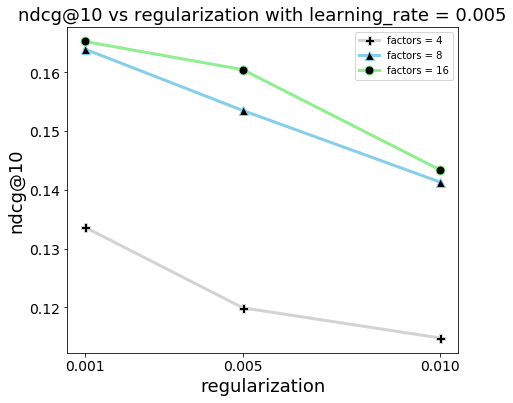

In [381]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'factors = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&(Test_implicit_set_ndcg['factors']== factors[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('ndcg@10 vs regularization with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [382]:
plt.savefig('ndcg_vs_regularization_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

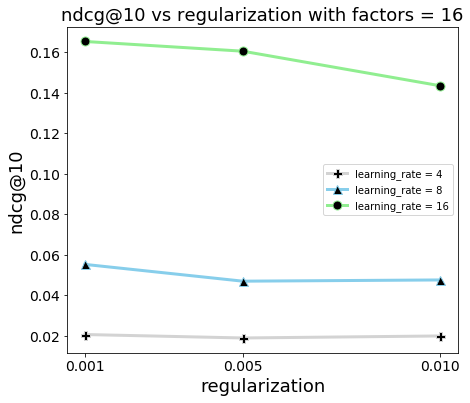

In [383]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 16)&(Test_implicit_set_ndcg['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('ndcg@10 vs regularization with factors = 16',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [384]:
plt.savefig('ndcg_vs_regularization_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

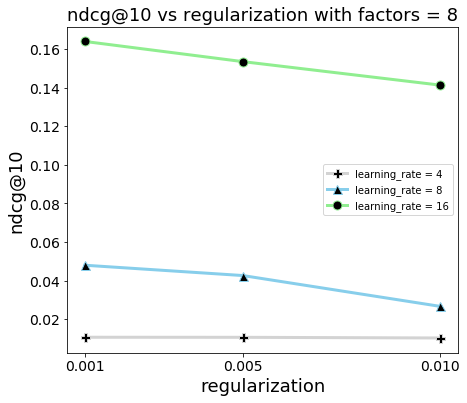

In [385]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 8)&(Test_implicit_set_ndcg['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('ndcg@10 vs regularization with factors = 8',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [386]:
plt.savefig('ndcg_vs_regularization_with_factors_8.eps', format='eps',fontsize = 18)

<Figure size 432x288 with 0 Axes>

## FMItem

In [77]:
FMItem_set_ndcg = FMItem_set[FMItem_set['metric'] == 'ndcg@10']
FMItem_set_percision = FMItem_set[FMItem_set['metric'] == 'precision@10']
FMItem_setrmse = FMItem_set[FMItem_set['metric'] == 'rmse']

## FMNone

In [78]:
FMNone_set_ndcg = FMNone_set[FMNone_set['metric'] == 'ndcg@10']
FMNone_set_percision = FMNone_set[FMNone_set['metric'] == 'precision@10']
FMNone_setrmse = FMNone_set[FMNone_set['metric'] == 'rmse']